In [ ]:
import tensorflow
print(tensorflow.__version__)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D,Flatten,Activation
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
valid = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory("basedata/train",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

valid_dataset = valid.flow_from_directory("basedata/valid",
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')


Found 2657 images belonging to 4 classes.
Found 334 images belonging to 4 classes.


In [ ]:
print(train_dataset.class_indices)
print(valid_dataset.class_indices)


{'Default': 0, 'Palm': 1, 'ThumbsDown': 2, 'ThumbsUp': 3}
{'Default': 0, 'Palm': 1, 'ThumbsDown': 2, 'ThumbsUp': 3}


In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(4, activation = "softmax"))
model.add(Flatten())

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
History = model.fit(train_dataset,epochs=20,validation_data=(valid_dataset,))
#,steps_per_epoch=10

Epoch 1/20
886/886 [==============================] - 85s 95ms/step - loss: 0.2495 - accuracy: 0.9198 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 2/20
886/886 [==============================] - 82s 93ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0235 - val_accuracy: 0.9940
Epoch 3/20
886/886 [==============================] - 80s 91ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.0181 - val_accuracy: 0.9910
Epoch 4/20
886/886 [==============================] - 89s 100ms/step - loss: 0.0520 - accuracy: 0.9883 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoch 5/20
886/886 [==============================] - 90s 101ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0117 - val_accuracy: 0.9940
Epoch 6/20
886/886 [==============================] - 80s 90ms/step - loss: 0.0774 - accuracy: 0.9857 - val_loss: 0.0329 - val_accuracy: 0.9880
Epoch 7/20
886/886 [==============================] - 80s 90ms/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 0.1333 - val_accurac

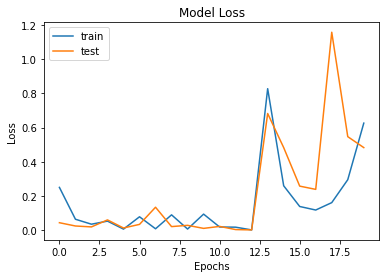

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

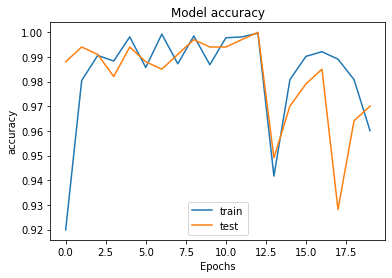

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 48, 48, 32)       

In [ ]:
loss,acc=model.evaluate(valid_dataset)
print('accuracy: {:5.2f}%'.format(100*acc))

112/112 [==============================] - 2s 14ms/step - loss: 0.4826 - accuracy: 0.9701
accuracy: 97.01%


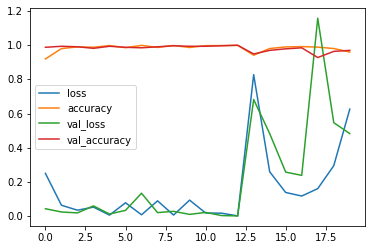

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(History.history).plot()
plt.show()

In [ ]:
model.save('my_model.h5')

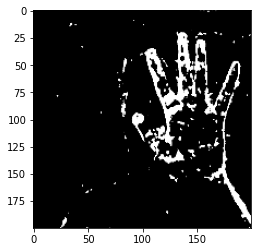

1/1 [==============================] - 0s 129ms/step
<class 'numpy.float32'>
[[0. 1. 0. 0.]]
Palm


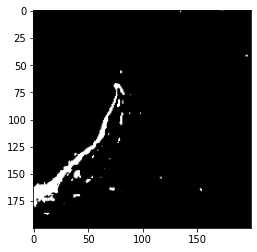

1/1 [==============================] - 0s 20ms/step
<class 'numpy.float32'>
[[0. 0. 0. 1.]]
Thumbup


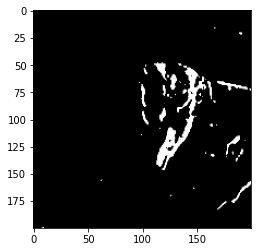

1/1 [==============================] - 0s 17ms/step
<class 'numpy.float32'>
[[0. 0. 1. 0.]]
ThumbDown


In [ ]:
dir_path = "basedata/test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x= image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    
    val = model.predict(images)
    print(type(val[0][0]))
    print(val)
    if val[0][1] == True:
        print('Palm')
    elif val[0][2] == True:
        print('ThumbDown')
    elif val[0][3] == True:
        print('Thumbup')
# model.predict("basedata/test/WIN_20220714_21_35_15_Pro (2).jpg")

In [ ]:
heatmap and conv